In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

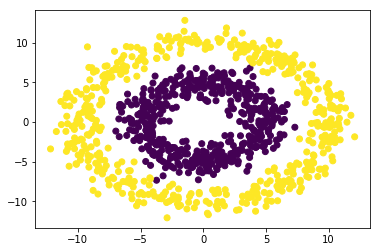

In [3]:
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [4]:
R1.shape

(500,)

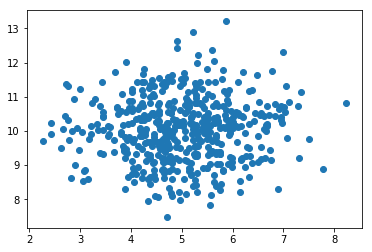

In [5]:
plt.scatter(R1, R2)
plt.show()

In [6]:
X

array([[-4.06845369,  3.26575456],
       [ 3.154305  ,  4.2311353 ],
       [ 0.13849125, -4.26883308],
       ...,
       [-7.85028492, -4.83244559],
       [-5.9477702 , -6.16444864],
       [ 5.67335247, -5.78209914]])

In [7]:
# ones = np.ones((N, 1))
# r = np.sqrt( (X * X).sum(axis=1) ).reshape(-1, 1)
# Xb = np.concatenate((ones, r, X), axis=1)

# # randomly initialize the weights
# w = np.random.randn(D + 2)

# # calculate the model output
# z = Xb.dot(w)

In [8]:
ones = np.ones((N, 1))
r = np.sqrt( (X * X).sum(axis=1) ).reshape(-1, 1)
X = np.concatenate((ones, r, X), axis=1)

# randomly initialize the weights
w = np.random.randn(2+2)

# calculate the model output
z = X.dot(w)

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
Y = sigmoid(z)

In [11]:
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [12]:
# let's do gradient descent 100 times
learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 500 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( X.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(X.dot(w))

5170.5159270287695
230.7727426289548
145.37864448931794
110.47372730584857
91.28745261619869
79.03930472530968
70.48394713089193
64.13837476711
59.225867833653226
55.29885616101086


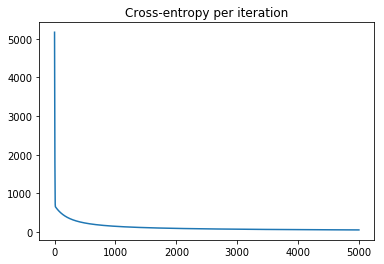

Final w: [-1.16356847e+01  1.56550221e+00 -3.26781637e-03 -3.00124140e-03]


In [13]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print("Final w:", w)

In [15]:
def classificationRate(y, yHat):
    return np.mean(y == yHat)

print("Final classification rate:", classificationRate(T, np.round(Y)))

Final classification rate: 0.997
